Application of a lexicon is one of the two main approaches to sentiment analysis and it involves calculating the sentiment from the semantic orientation of word or phrases that occur in a text. Generally speaking, in lexicon-based approaches a piece of text message is represented as a bag of words.

Lexicon based scoring/classification is an unsupervised classification suited for sentiment or multi class classification. The idea is to use a score associated with Lexicon (a dictionary word) in the sentense. Once the lexicon is set, the scoring is real time and can be tested against a labelled data set. In this session we will work with both unlabelled and labelled data sets to implement the lexicon based classifications.


### ACCESS -> EXPLORE 
                  CLASSIFICATION 
                          RULE BASED
                              LEXICONS
                              
                          DATA BASED
                              ML (NAIVES BAYENS, NEURAL NETWORKS, SVM, RANDOM FOREST)
                  TOPIC DETECTION
                  QA SYSTEM
                  
LEXICON BASED CLASSIFICATIO.
### ACCESS --> TOKENIZE --> NORMALIZE --> COMPUTE SCORE --> REPORT
                   EXPLORE         EXPLORE           LEXICON                  CONFUSSION MATRIX
                                                                              TRUE POSITIVE/NEGATIVE RATE

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [2]:
#Read the unlabelled Tweet set
df = pd.read_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\TweetSet.csv", header = 0, names = ['tweet_id', 'tweet_time', 'tweet'])

In [3]:
#Explore the data
df.head()

,tweet_id,tweet_time,tweet
0,3.300483e+17,5/2/2013 19:57,#Nw Iron man 3
1,3.300483e+17,5/2/2013 19:57,what if @elonmusk played Tony Stark in #ironman4?
2,3.300483e+17,5/2/2013 19:57,11 Things You Need To Know Before Seeing Iron ...
3,3.300483e+17,5/2/2013 19:57,I want to see Mac Miller as bad as I want to s...
4,3.300483e+17,5/2/2013 19:57,Iron Man 3 tonight!!


In [4]:
#Create the tokens in a seperate column in the dataframe
df['words'] = df.tweet.str.strip().str.split('[\W_]+')
df.head()

,tweet_id,tweet_time,tweet,words
0,3.300483e+17,5/2/2013 19:57,#Nw Iron man 3,"[, Nw, Iron, man, 3]"
1,3.300483e+17,5/2/2013 19:57,what if @elonmusk played Tony Stark in #ironman4?,"[what, if, elonmusk, played, Tony, Stark, in, ..."
2,3.300483e+17,5/2/2013 19:57,11 Things You Need To Know Before Seeing Iron ...,"[11, Things, You, Need, To, Know, Before, Seei..."
3,3.300483e+17,5/2/2013 19:57,I want to see Mac Miller as bad as I want to s...,"[I, want, to, see, Mac, Miller, as, bad, as, I..."
4,3.300483e+17,5/2/2013 19:57,Iron Man 3 tonight!!,"[Iron, Man, 3, tonight, ]"


In [5]:
#Get the words to be scored by lexicon
corpus = df['words'].values

In [6]:
corpus[0:5]

array([list(['', 'Nw', 'Iron', 'man', '3']),
       list(['what', 'if', 'elonmusk', 'played', 'Tony', 'Stark', 'in', 'ironman4', '']),
       list(['11', 'Things', 'You', 'Need', 'To', 'Know', 'Before', 'Seeing', 'Iron', 'Man', '3', 'From', 'The', 'Ten', 'Rings', 'to', 'Roxxon', 'http', 't', 'co', 'AynZ16mAfB']),
       list(['I', 'want', 'to', 'see', 'Mac', 'Miller', 'as', 'bad', 'as', 'I', 'want', 'to', 'see', 'Iron', 'Man', '3']),
       list(['Iron', 'Man', '3', 'tonight', ''])], dtype=object)

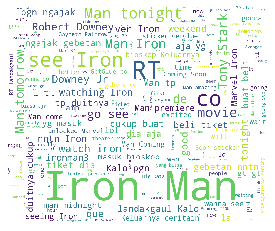

In [7]:
#Visualize the world cloud
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df['tweet']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
my_text = df.sample(100)

In [9]:
#my_text.to_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\test.csv")

In [10]:
#Read the lexicon file
lex_file = open("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\AFINN-111.csv")

In [11]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [12]:
#For each tweet
#For each word in tweet
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for tweet in corpus:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score > 0):
        prediction.append('positive')
    elif (score <0):
        prediction.append('negative')
    else:
        prediction.append('Neutral')
print(strength)
print(prediction)

[0, 0, 0, -1, 0, 0, 0, 0, -5, 0, 0, 0, 0, 0, -1, -3, 1, 0, 4, 0, 0, -3, 0, 3, 0, -7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, -3, -3, 0, 0, 0, 0, -4, -3, 0, 3, 2, 0, 0, 0, -2, 0, 0, 0, 0, 3, 0, 0, 0, -4, 0, 0, 0, -1, 0, 0, -1, 0, 0, 1, 0, 6, 2, 0, 4, -2, 0, -4, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 6, 0, 2, 0, 0, 0, 0, -1, -5, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 3, -3, 0, 0, 0, 0, 0, -4, 0, 1, 0, -1, 4, 3, 0, 0, 0, -2, 0, -2, 1, -3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, -5, 0, 4, 0, -2, -2, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 2, -2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, -2, 0, 0, -4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 5, 0, 0, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 1, -2, 0, 2, 0, 7, 0, 0, 4, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 3, 0, 0, 3, 0, 0, 3, 0, 3, 5, 0, 0, 0, 2, 0, 3, 3, 1, 0, 0, 2, 0, 2, 0, 0, 

In [13]:
df['strength'] = strength
df['prediction']= prediction

In [14]:
df.head()

,tweet_id,tweet_time,tweet,words,strength,prediction
0,3.300483e+17,5/2/2013 19:57,#Nw Iron man 3,"[, Nw, Iron, man, 3]",0,Neutral
1,3.300483e+17,5/2/2013 19:57,what if @elonmusk played Tony Stark in #ironman4?,"[what, if, elonmusk, played, Tony, Stark, in, ...",0,Neutral
2,3.300483e+17,5/2/2013 19:57,11 Things You Need To Know Before Seeing Iron ...,"[11, Things, You, Need, To, Know, Before, Seei...",0,Neutral
3,3.300483e+17,5/2/2013 19:57,I want to see Mac Miller as bad as I want to s...,"[I, want, to, see, Mac, Miller, as, bad, as, I...",-1,negative
4,3.300483e+17,5/2/2013 19:57,Iron Man 3 tonight!!,"[Iron, Man, 3, tonight, ]",0,Neutral


In [15]:
#Explore the results
df.groupby('prediction')['prediction'].count()

prediction
Neutral     1399
negative     189
positive     414
Name: prediction, dtype: int64

In this section, lets work on a labelled tweet set. Now we will be testing the effectivenss of the lexicons against a preset benchmark and will provide us with insights into the improvement of the lexicon.

In [16]:
#Read the unlabelled Tweet set
df = pd.read_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\TweetSent.csv", header = 0, names = ['tweet', 'sentiment'])

In [17]:
df.head()

,tweet,sentiment
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [18]:
df['sentiment'] = df['sentiment'].map(lambda x: x.lstrip('|'))

In [19]:
df.head()

,tweet,sentiment
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [20]:
#Create the tokens in a seperate column in the dataframe
df['words'] = df.tweet.str.strip().str.split('[\W_]+')
df.head()

,tweet,sentiment,words
0,Not Available,negative,"[Not, Available]"
1,IOS 9 App Transport Security. Mm need to check...,neutral,"[IOS, 9, App, Transport, Security, Mm, need, t..."
2,"Mar if you have an iOS device, you should down...",neutral,"[Mar, if, you, have, an, iOS, device, you, sho..."
3,@jimmie_vanagon my phone does not run on lates...,negative,"[, jimmie, vanagon, my, phone, does, not, run,..."
4,Not sure how to start your publication on iOS?...,positive,"[Not, sure, how, to, start, your, publication,..."


In [21]:
#Get the words to be scored by lexicon
corpus = df['words'].values
corpus[0:5]

array([list(['Not', 'Available']),
       list(['IOS', '9', 'App', 'Transport', 'Security', 'Mm', 'need', 'to', 'check', 'if', 'my', '3rd', 'party', 'network', 'pod', 'supports', 'it', 'http', 't', 'co', 'fmtcfUAdgj']),
       list(['Mar', 'if', 'you', 'have', 'an', 'iOS', 'device', 'you', 'should', 'download', 'our', 'app', 'too', 'http', 't', 'co', 'gl3tn2uDnD']),
       list(['', 'jimmie', 'vanagon', 'my', 'phone', 'does', 'not', 'run', 'on', 'latest', 'IOS', 'which', 'may', 'account', 'for', 'problem', 'the', 'other', 'day', 'time', 'it', 'was', 'replaced']),
       list(['Not', 'sure', 'how', 'to', 'start', 'your', 'publication', 'on', 'iOS', 'We', 'll', 'be', 'live', 'helping', 'with', 'ask', 'me', 'anything', 'sessions', 'today', 'and', 'Friday', 'http', 't', 'co', 'KPqqGjjh3x'])],
      dtype=object)

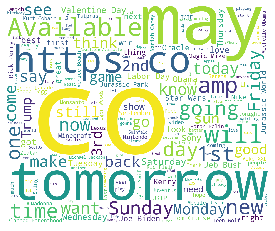

In [22]:
#Visualize the world cloud
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df['tweet']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
#For each tweet
#For each word in tweet
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for tweet in corpus:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score > 0):
        prediction.append('positive')
    elif (score <0):
        prediction.append('negative')
    else:
        prediction.append('Neutral')

In [24]:
#Update the dataframe with predicted score and sentiment
df['strength'] = strength
df['prediction']= prediction

In [25]:
df.head()

,tweet,sentiment,words,strength,prediction
0,Not Available,negative,"[Not, Available]",0,Neutral
1,IOS 9 App Transport Security. Mm need to check...,neutral,"[IOS, 9, App, Transport, Security, Mm, need, t...",2,positive
2,"Mar if you have an iOS device, you should down...",neutral,"[Mar, if, you, have, an, iOS, device, you, sho...",0,Neutral
3,@jimmie_vanagon my phone does not run on lates...,negative,"[, jimmie, vanagon, my, phone, does, not, run,...",-2,negative
4,Not sure how to start your publication on iOS?...,positive,"[Not, sure, how, to, start, your, publication,...",2,positive


In [26]:
#Explore the results
df.groupby('prediction')['prediction'].count()

prediction
Neutral     3038
negative    1021
positive    1909
Name: prediction, dtype: int64

In [27]:
#Explore the results
df.groupby('sentiment')['sentiment'].count()

sentiment
Tweet          1
negative     956
neutral     2123
positive    2888
Name: sentiment, dtype: int64

In [28]:
pd.crosstab(df['sentiment'], df['prediction'])

prediction,Neutral,negative,positive
sentiment,,,
Tweet,1,0,0
negative,382,371,203
neutral,1158,417,548
positive,1497,233,1158


## Self sample data

In [29]:
#Read the unlabelled Tweet set
df = pd.read_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\test.csv", header = 0, names = ['tweet', 'sentiment'])

In [30]:
df.head()

,,,tweet,sentiment
589,3.300000e+17,5/2/2013 23:01,@SixOkay tony stark is iron man #spoilers,Negative
802,3.300000e+17,5/2/2013 23:02,If the extra scene at the end of Iron Man 3 do...,Negative
1741,3.300000e+17,5/3/2013 3:46,I'm at Pacific Theatres at The Grove for Iron ...,Negative
1742,3.300000e+17,5/3/2013 3:46,I'm just not sure what I thought about Iron Ma...,Negative
1940,3.300000e+17,5/3/2013 3:47,Iron Man 3 mutha fuckas!!,Negative


In [31]:
df['sentiment'] = df['sentiment'].map(lambda x: x.lstrip('|'))

In [32]:
df.head()

,,,tweet,sentiment
589,3.300000e+17,5/2/2013 23:01,@SixOkay tony stark is iron man #spoilers,Negative
802,3.300000e+17,5/2/2013 23:02,If the extra scene at the end of Iron Man 3 do...,Negative
1741,3.300000e+17,5/3/2013 3:46,I'm at Pacific Theatres at The Grove for Iron ...,Negative
1742,3.300000e+17,5/3/2013 3:46,I'm just not sure what I thought about Iron Ma...,Negative
1940,3.300000e+17,5/3/2013 3:47,Iron Man 3 mutha fuckas!!,Negative


In [33]:
#Create the tokens in a seperate column in the dataframe
df['words'] = df.tweet.str.strip().str.split('[\W_]+')
df.head()

,,,tweet,sentiment,words
589,3.300000e+17,5/2/2013 23:01,@SixOkay tony stark is iron man #spoilers,Negative,"[, SixOkay, tony, stark, is, iron, man, spoilers]"
802,3.300000e+17,5/2/2013 23:02,If the extra scene at the end of Iron Man 3 do...,Negative,"[If, the, extra, scene, at, the, end, of, Iron..."
1741,3.300000e+17,5/3/2013 3:46,I'm at Pacific Theatres at The Grove for Iron ...,Negative,"[I, m, at, Pacific, Theatres, at, The, Grove, ..."
1742,3.300000e+17,5/3/2013 3:46,I'm just not sure what I thought about Iron Ma...,Negative,"[I, m, just, not, sure, what, I, thought, abou..."
1940,3.300000e+17,5/3/2013 3:47,Iron Man 3 mutha fuckas!!,Negative,"[Iron, Man, 3, mutha, fuckas, ]"


In [34]:
#Get the words to be scored by lexicon
corpus = df['words'].values
corpus[0:5]

array([list(['', 'SixOkay', 'tony', 'stark', 'is', 'iron', 'man', 'spoilers']),
       list(['If', 'the', 'extra', 'scene', 'at', 'the', 'end', 'of', 'Iron', 'Man', '3', 'doesn', 't', 'involve', 'Agent', 'Coulson', 'then', 'I', 'm', 'gonna', 'stab', 'somebody', 'clarkgregg']),
       list(['I', 'm', 'at', 'Pacific', 'Theatres', 'at', 'The', 'Grove', 'for', 'Iron', 'Man', '3', 'Los', 'Angeles', 'CA', 'http', 't', 'co', 'mfu873fA5G']),
       list(['I', 'm', 'just', 'not', 'sure', 'what', 'I', 'thought', 'about', 'Iron', 'Man', '3', '']),
       list(['Iron', 'Man', '3', 'mutha', 'fuckas', ''])], dtype=object)

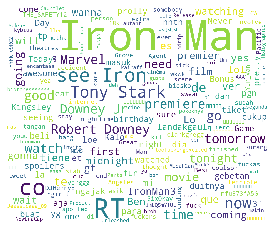

In [35]:
#Visualize the world cloud
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df['tweet']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [36]:
#For each tweet
#For each word in tweet
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for tweet in corpus:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score > 0):
        prediction.append('positive')
    elif (score <0):
        prediction.append('negative')
    else:
        prediction.append('Neutral')

In [37]:
#Update the dataframe with predicted score and sentiment
df['strength'] = strength
df['prediction']= prediction

In [38]:
df.head()

,,,tweet,sentiment,words,strength,prediction
589,3.300000e+17,5/2/2013 23:01,@SixOkay tony stark is iron man #spoilers,Negative,"[, SixOkay, tony, stark, is, iron, man, spoilers]",0,Neutral
802,3.300000e+17,5/2/2013 23:02,If the extra scene at the end of Iron Man 3 do...,Negative,"[If, the, extra, scene, at, the, end, of, Iron...",-2,negative
1741,3.300000e+17,5/3/2013 3:46,I'm at Pacific Theatres at The Grove for Iron ...,Negative,"[I, m, at, Pacific, Theatres, at, The, Grove, ...",0,Neutral
1742,3.300000e+17,5/3/2013 3:46,I'm just not sure what I thought about Iron Ma...,Negative,"[I, m, just, not, sure, what, I, thought, abou...",0,Neutral
1940,3.300000e+17,5/3/2013 3:47,Iron Man 3 mutha fuckas!!,Negative,"[Iron, Man, 3, mutha, fuckas, ]",0,Neutral


In [39]:
#Explore the results
df.groupby('prediction')['prediction'].count()

prediction
Neutral     69
negative    12
positive    19
Name: prediction, dtype: int64

In [40]:
#Explore the results
df.groupby('sentiment')['sentiment'].count()

sentiment
Negative    22
Netural     13
Positive    65
Name: sentiment, dtype: int64

In [45]:
ct = pd.crosstab(df['sentiment'], df['prediction'])

In [47]:
ct.values

array([[11,  8,  3],
       [12,  0,  1],
       [46,  4, 15]], dtype=int64)

In [42]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [48]:
print("precision total:", precision_macro_average(ct.values))
print("recall total:", recall_macro_average(ct.values))

precision total: 0.3162979913551996
recall total: 0.2435897435897436


In [49]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [50]:
accuracy(ct.values)

0.26